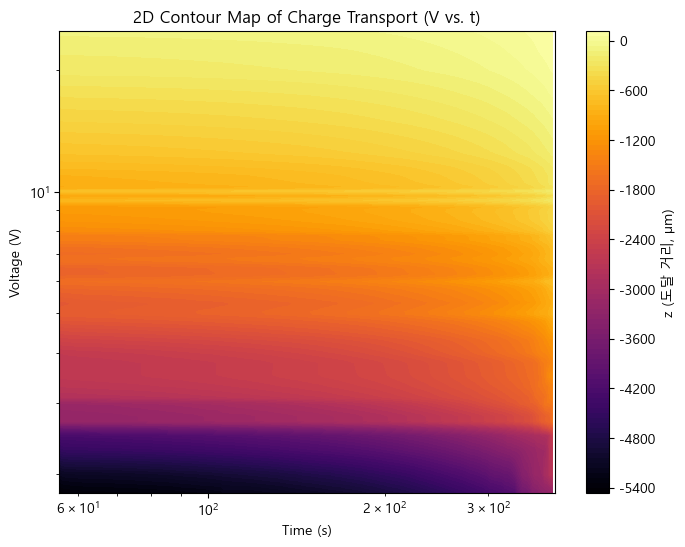

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.interpolate import griddata

# 이동평균 필터 함수
def moving_average(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

# 데이터 디렉토리 설정
data_dir = "A3054_Boundary_lines_confirmed_resized_IMPORTANT"
file_list = sorted([f for f in os.listdir(data_dir) if f.endswith(".dat")])

t_values = []  # 시간 데이터
V_values = []  # 전압 데이터
z_values = []  # 거리 데이터

for file in file_list:
    file_path = os.path.join(data_dir, file)
    V_value = float(os.path.basename(file).split("V")[0])  # 파일명에서 V 추출
    
    if V_value < 1.8:  # 1.8V 미만 데이터 무시
        continue
    
    df = pd.read_csv(file_path, sep=",", header=None, names=["t", "z"])
    df["z"] = 400 - df["z"]  # z를 400-z로 변환
    
    df = df.groupby("t").mean().reset_index()  # 중복된 t값 평균 처리
    
    t_values.extend(df["t"].values)
    V_values.extend([V_value] * len(df))
    z_values.extend(df["z"].values)  # 이동평균 적용

    #z_values.extend(moving_average(df["z"].values))  # 이동평균 적용

# 2D Grid 생성
t_grid = np.logspace(np.log10(min(t_values)), np.log10(max(t_values)), 200)
V_grid = np.logspace(np.log10(min(V_values)), np.log10(max(V_values)), 200)
T, V = np.meshgrid(t_grid, V_grid)
Z = griddata((t_values, V_values), z_values, (T, V), method='linear')

# 칸토어 플롯
ticks = [1, 10, 100, 1000, 10000]
plt.figure(figsize=(8, 6))
c = plt.contourf(T, V, Z, levels=100, cmap='inferno')
plt.xscale('log')
plt.yscale('log')
plt.colorbar(c, label='z (도달 거리, μm)')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('2D Contour Map of Charge Transport (V vs. t)')
plt.show()

NameError: name 't_values' is not defined

In [34]:
import os
import pandas as pd
import numpy as np
from glob import glob

# 데이터가 있는 폴더 지정
data_folder = "A3054_Boundary_lines_confirmed_resized_IMPORTANT"  # 실제 경로로 변경

# 파일 목록 가져오기
file_list = glob(os.path.join(data_folder, "*.dat"))

# 결과 저장 리스트
data_list = []

for file in file_list:
    # 파일명에서 V 값 추출 (예: "1.8V-Tot-resized.dat" → 1.8V)
    try:
        V_value = float(os.path.basename(file).split("V")[0])
    except ValueError:
        continue  # 파일명에서 숫자 추출 실패 시 건너뛰기

    # 1.8V 미만은 무시
    if V_value < 1.8:
        continue

    # 데이터 불러오기 (","로 구분된 경우)
    df = pd.read_csv(file, sep=",", header=None, names=["t", "z"])

    # 400-z 변환 (전압 방향 반전 고려)
    df["z"] = 400 - df["z"]

    # V 컬럼 추가
    df["V"] = V_value

    # 데이터 리스트에 추가
    data_list.append(df)

# 모든 데이터 합치기
final_df = pd.concat(data_list, ignore_index=True)

# 중복된 (V, t) 값 평균 처리
final_df = final_df.groupby(["V", "t"], as_index=False).mean()

# CSV 파일로 저장
final_df.to_csv("charge_transport_data.csv", index=False)

print("CSV 파일 저장 완료!")


CSV 파일 저장 완료!
